In [87]:
import os
import sys
import xlrd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

main_folder  = os.getcwd()
data_folder = os.path.join(main_folder, "input")
resu_folder = os.path.join(main_folder, "output")

In [88]:
# Load input data from top500.org
data = {}
date = []
for file in os.listdir(data_folder):
    yearmonth = file.split('_')[1].split('.')[0]
    date.append(yearmonth)
    
    # Open the current xls file
    wb = xlrd.open_workbook(os.path.join(data_folder, file), logfile=open(os.devnull, 'w'))
    if int(yearmonth) < 200800:
        data[yearmonth] = pd.read_excel(wb, engine='xlrd', header=1)
    else:
        data[yearmonth] = pd.read_excel(wb, engine='xlrd')

In [89]:
data["201911"]

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Country,Year,...,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Region,Continent,Site ID,System ID
0,1,1.0,51,1,Summit,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",DOE/SC/Oak Ridge National Laboratory,IBM,United States,2018,...,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,Americas,48553,179397
1,2,2.0,51,3,Sierra,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",DOE/NNSA/LLNL,IBM / NVIDIA / Mellanox,United States,2018,...,22,IBM POWER9,IBM Power System AC922,IBM Power Systems,Infiniband,Dual-rail Mellanox EDR Infiniband,North America,Americas,49763,179398
2,3,3.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,...,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Eastern Asia,Asia,50623,178764
3,4,4.0,41,1,Tianhe-2A,"TH-IVB-FEP Cluster, Intel Xeon E5-2692v2 12C 2...",National Super Computer Center in Guangzhou,NUDT,China,2018,...,12,Intel Xeon E5 (IvyBridge),TH-IVB-FEP Cluster,TH-IVB Cluster,Custom Interconnect,TH Express-2,Eastern Asia,Asia,50365,177999
4,5,5.0,53,5,Frontera,"Dell C6420, Xeon Platinum 8280 28C 2.7GHz, Mel...",Texas Advanced Computing Center/Univ. of Texas,Dell EMC,United States,2019,...,28,Xeon Platinum 82xx (Cascade Lake),PowerEdge C6420,Dell PowerEdge Cluster,Infiniband,Mellanox InfiniBand HDR,North America,Americas,48958,179607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,395.0,48,89,LANL/NNSA CTS-1 Ice,"Tundra Extreme Scale, Xeon E5-2695v4 18C 2.1GH...",Los Alamos National Laboratory,Penguin Computing,United States,2016,...,18,Intel Xeon E5 (Broadwell),Tundra Extreme Scale,Penguin Computing Cluster,Omnipath,Intel Omni-Path,North America,Americas,48276,178974
496,497,396.0,50,325,NaN,"Huawei RH2288H V3 Cluster, Xeon E5-2680v4 14C ...",Petroleum Company,Huawei,China,2017,...,14,Intel Xeon E5 (Broadwell),Huawei RH2288H V3 Cluster,Huawei Cluster,Infiniband,Infiniband FDR,Eastern Asia,Asia,50754,179303
497,498,397.0,52,313,NaN,"Inspur TS10000, Xeon Platinum 8160 24C 2.1GHz...",Service Provider T,Inspur,China,2018,...,24,Xeon Platinum,Inspur TS10000,Inspur Cluster,Gigabit Ethernet,10G Ethernet,Eastern Asia,Asia,50329,179513
498,499,398.0,52,314,NaN,"Inspur TS10000, Xeon Platinum 8160 24C 2.1GHz...",Service Provider T,Inspur,China,2018,...,24,Xeon Platinum,Inspur TS10000,Inspur Cluster,Gigabit Ethernet,10G Ethernet,Eastern Asia,Asia,50329,179514


# To start, have a look at the most recent list and briefly comment on the following question:

In [90]:
yearmonth = "201911"

### What manufacturers produce the world's largest supercomputers?

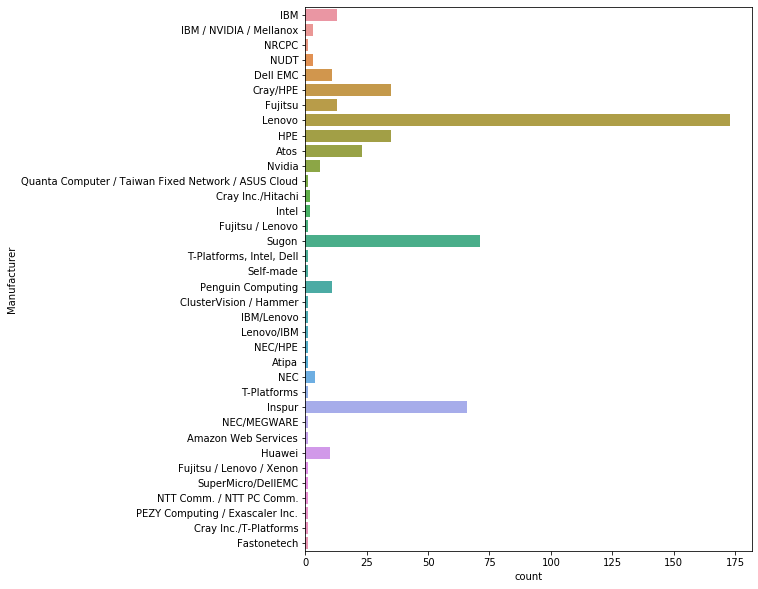

In [91]:
plt.figure(figsize=(8,10))
g = sns.countplot(y="Manufacturer", data=data[yearmonth])

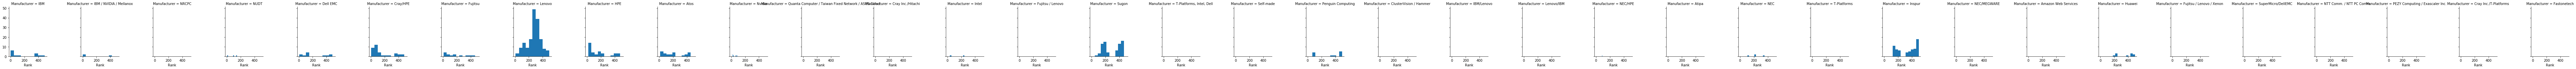

In [92]:
g = sns.FacetGrid(data[yearmonth], col='Manufacturer')
g.map(plt.hist, "Rank")

### What types of processors do they use?

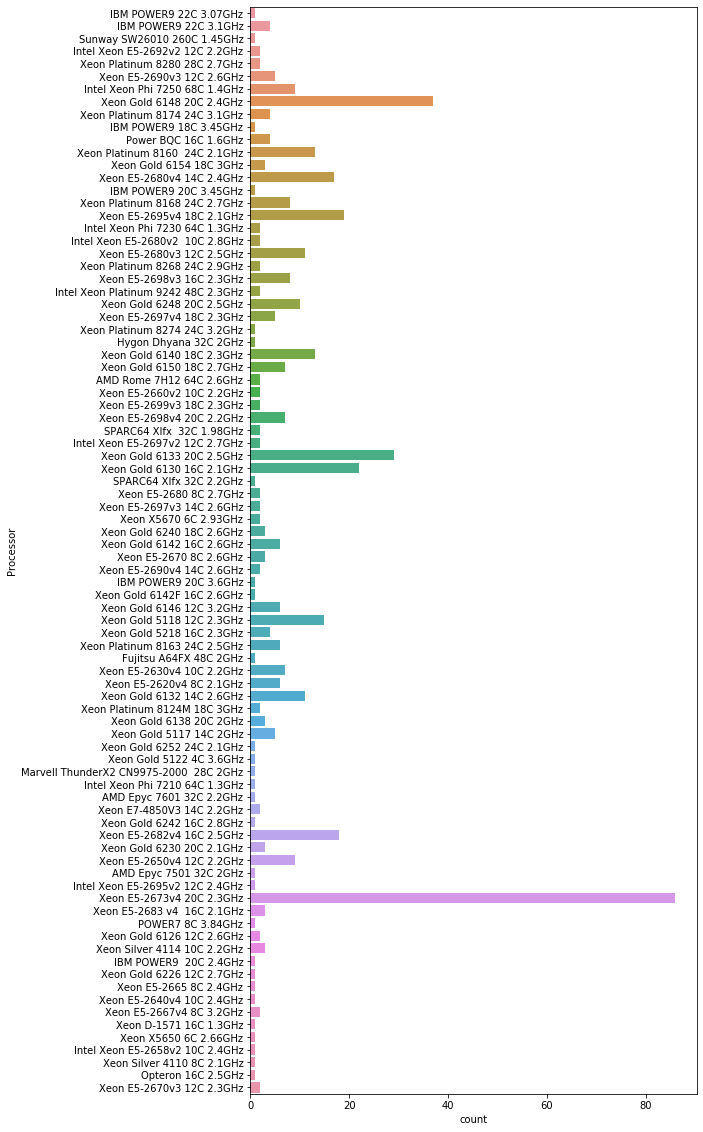

In [93]:
plt.figure(figsize=(8,20))
g = sns.countplot(y="Processor", data=data[yearmonth])

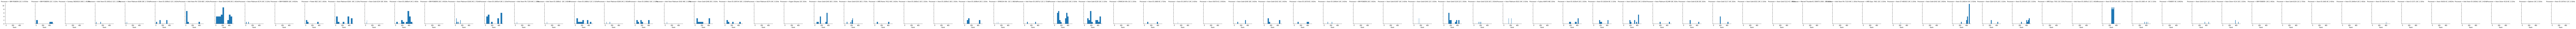

In [94]:
g = sns.FacetGrid(data[yearmonth], col='Processor')
g.map(plt.hist, "Rank")

More information:

- Processor Technology

- Processor Speed

- Cores per Socket

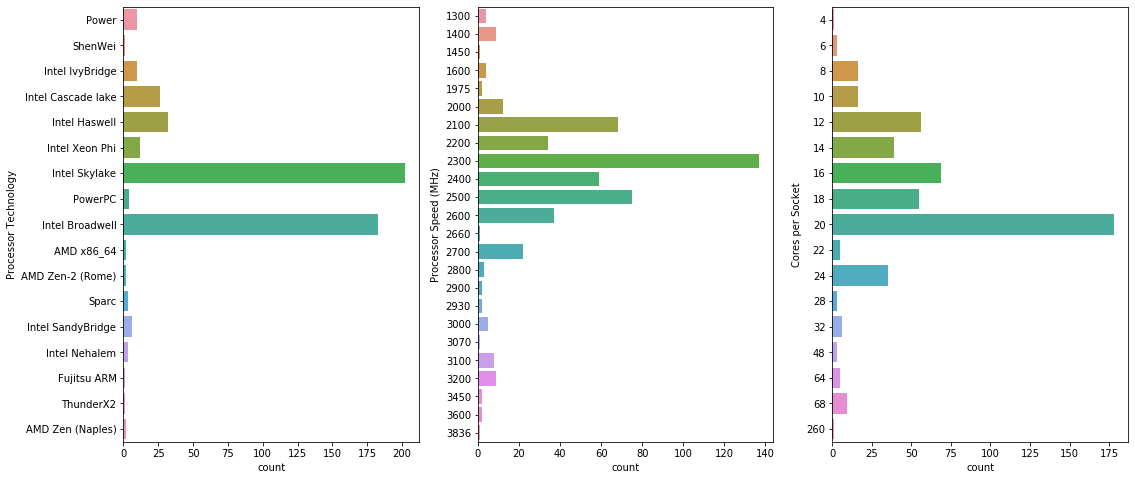

In [95]:
fig = plt.figure(figsize=(3*6,8))
fig.add_subplot(1, 3, 1)
g = sns.countplot(y="Processor Technology", data=data[yearmonth])

fig.add_subplot(1, 3, 2)
g = sns.countplot(y="Processor Speed (MHz)", data=data[yearmonth])

fig.add_subplot(1, 3, 3)
g = sns.countplot(y="Cores per Socket", data=data[yearmonth])

### What fraction of peak performance is typically achieved for the LINPACK benchmark?

Text(0, 0.5, 'Rpeak [TFlop/s]')

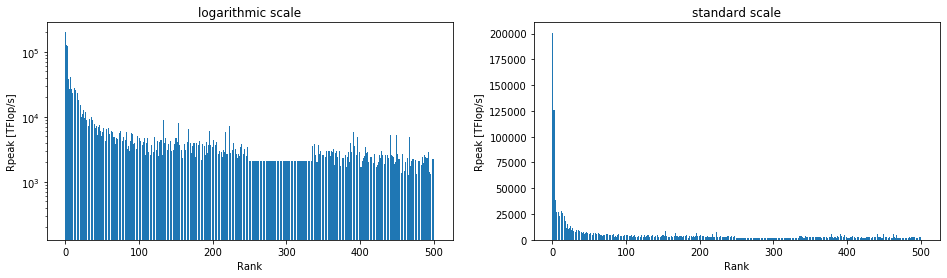

In [96]:
fig = plt.figure(figsize=(2*8,4))

fig.add_subplot(1, 2, 1).set_title("logarithmic scale")
plt.bar(data[yearmonth]["Rank"], data[yearmonth]["Rpeak [TFlop/s]"])
plt.yscale('log')
plt.xlabel('Rank')
plt.ylabel('Rpeak [TFlop/s]')

fig.add_subplot(1, 2, 2).set_title("standard scale")
plt.bar(data[yearmonth]["Rank"], data[yearmonth]["Rpeak [TFlop/s]"])
plt.xlabel('Rank')
plt.ylabel('Rpeak [TFlop/s]')

# Build a ML model to predict Rpeak, Rmax, Total number of cores and Core speed for the 5 next years

### Database of the TOP1

In [97]:
head_num = 10 # Number of best computers to use for predictions

df = pd.DataFrame()
for yearmonth in date:
    df = df.append(data[yearmonth].head(head_num), ignore_index=True)
    
df["Top500"] = [el[4:]+"-"+el[:4] for el in date for i in range(head_num)]
    
df["Rpeak [TFlop/s]"]                = df.fillna(0)["RPeak"].apply(lambda x: x/1000) + df.fillna(0)["Rpeak [TFlop/s]"]
df["Rpeak [TFlop/s]"]                = df.fillna(0)["Rpeak"].apply(lambda x: x/1000) + df.fillna(0)["Rpeak [TFlop/s]"]
df["Rmax [TFlop/s]"]                 = df.fillna(0)["RMax"].apply(lambda x: x/1000)  + df.fillna(0)["Rmax [TFlop/s]"]
df["Rmax [TFlop/s]"]                 = df.fillna(0)["Rmax"].apply(lambda x: x/1000)  + df.fillna(0)["Rmax [TFlop/s]"]
df["Processor Speed (MHz)"]          = df.fillna(0)["Proc. Frequency"]               + df.fillna(0)["Processor Speed (MHz)"]
df["Total Cores"]                    = df.fillna(0)["Processors"]                    + df.fillna(0)["Total Cores"]
df["Total Cores"]                    = df.fillna(0)["Cores"]                         + df.fillna(0)["Total Cores"]
df["Cores per Socket"]               = df.fillna(0)["Processor Cores"]               + df.fillna(0)["Cores per Socket"]
df["Power (kW)"]                     = df.fillna(0)["Power"]                         + df.fillna(0)["Power (kW)"]
df["Processor Technology"]           = df.fillna("")["Processor Family"]             + df.fillna("")["Processor Technology"]
df["Accelerator/Co-Processor"]       = df.fillna("")["Accelerator"]                  + df.fillna("")["Accelerator/Co-Processor"]
df["Accelerator/Co-Processor Cores"] = df.fillna(0)["Accelerator Cores"]             + df.fillna(0)["Accelerator/Co-Processor Cores"]

df = df.drop(["RMax",
              "Rmax",
              "RPeak",
              "Rpeak",
              "Proc. Frequency",
              "Processors",
              "Cores",
              "Processor Cores",
              "Power",
              "Processor Family",
              "Accelerator",
              "Accelerator Cores",
             ], axis=1)

# Useless features (due to links, ids, etc...)
df = df.drop(["Power Effeciency [GFlops/Watts]",  # = Rmax / Power
              "Mflops/Watt",                      # = Rmax / Power
              "Site ID",
              "System ID",
              "Efficiency (%)",                   # = Rmax / Rpeak
              "Effeciency (%)",                   # = Rmax / Rpeak
              "Application Area",                 # Useless and not enought info
              "Country",                          # Geography
              "Region",                           # Geography
              "Continent",                        # Geography
              "Measured Size",                    # Only for 1 year
             ], axis=1)

df

,Rank,Site,Manufacturer,Computer,Year,Nmax,Nhalf,Processor,System Family,Operating System,...,First Appearance,First Rank,Accelerator/Co-Processor Cores,Accelerator/Co-Processor,Power Source,Rmax [TFlop/s],Rpeak [TFlop/s],HPCG [TFlop/s],Power (kW),Top500
0,1,DOE/NNSA/LLNL,IBM,eServer Blue Gene Solution,2005,1277951.0,0.0,PowerPC 440,IBM BlueGene/L,CNK/SLES 9,...,NaN,NaN,0.0,,NaN,136.80,183.50000,NaN,0.00,06-2005
1,2,IBM Thomas J. Watson Research Center,IBM,eServer Blue Gene Solution,2005,983039.0,0.0,PowerPC 440,IBM BlueGene/L,CNK/SLES 9,...,NaN,NaN,0.0,,NaN,91.29,114.68800,NaN,0.00,06-2005
2,3,NASA/Ames Research Center/NAS,SGI,"SGI Altix 1.5 GHz, Voltaire Infiniband",2004,1290240.0,0.0,Intel IA-64 Itanium 2,SGI Altix,SuSE Linux Enterprise Server 9,...,NaN,NaN,0.0,,NaN,51.87,60.96000,NaN,0.00,06-2005
3,4,The Earth Simulator Center,NEC,Earth-Simulator,2002,1075200.0,266240.0,NEC,NEC Vector,Super-UX,...,NaN,NaN,0.0,,NaN,35.86,40.96000,NaN,0.00,06-2005
4,5,Barcelona Supercomputing Center,IBM,"JS20 Cluster, PPC 970, 2.2 GHz, Myrinet",2005,977816.0,0.0,PowerPC 970,IBM Cluster,SuSE Linux Enterprise Server 9,...,NaN,NaN,0.0,,NaN,27.91,42.14400,NaN,0.00,06-2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6,Swiss National Supercomputing Centre (CSCS),Cray/HPE,"Cray XC50, Xeon E5-2690v3 12C 2.6GHz, Aries in...",2017,3743232.0,NaN,Xeon E5-2690v3 12C 2.6GHz,Cray XC,Cray Linux Environment,...,40.0,114.0,319424.0,NVIDIA Tesla P100,Submitted,21230.00,27154.30000,496.978,2384.24,11-2019
296,7,DOE/NNSA/LANL/SNL,Cray/HPE,"Cray XC40, Xeon E5-2698v3 16C 2.3GHz, Intel Xe...",2017,12353536.0,NaN,Intel Xeon Phi 7250 68C 1.4GHz,Cray XC,Cray Linux Environment,...,46.0,6.0,0.0,None,Submitted,20158.70,41461.15000,546.124,7578.10,11-2019
297,8,National Institute of Advanced Industrial Scie...,Fujitsu,"PRIMERGY CX2570 M4, Xeon Gold 6148 20C 2.4GHz,...",2018,2918016.0,NaN,Xeon Gold 6148 20C 2.4GHz,Fujitsu PRIMERGY,Linux,...,51.0,5.0,348160.0,NVIDIA Tesla V100 SXM2,Optimized,19880.00,32576.63488,508.854,1649.25,11-2019
298,9,Leibniz Rechenzentrum,Lenovo,"ThinkSystem SD650, Xeon Platinum 8174 24C 3.1G...",2018,8402688.0,NaN,Xeon Platinum 8174 24C 3.1GHz,Lenovo ThinkSystem,SUSE Linux Enterprise Server 12 SP3,...,52.0,8.0,0.0,None,NaN,19476.60,26873.85600,207.844,0.00,11-2019


In [98]:
dftop = pd.DataFrame(df[["Top500", "Rank"]])
dftop["Rpeak [TFlop/s]"]       = df["Rpeak [TFlop/s]"]
dftop["Rmax [TFlop/s]"]        = df["Rmax [TFlop/s]"]
dftop["Total Cores"]           = df["Total Cores"]
dftop["Processor Speed (MHz)"] = df["Processor Speed (MHz)"]

dftop["Order"] = [j for j in range(30) for i in range(head_num)]

dftop

,Top500,Rank,Rpeak [TFlop/s],Rmax [TFlop/s],Total Cores,Processor Speed (MHz),Order
0,06-2005,1,183.50000,136.80,65536.0,700.0,0
1,06-2005,2,114.68800,91.29,40960.0,700.0,0
2,06-2005,3,60.96000,51.87,10160.0,1500.0,0
3,06-2005,4,40.96000,35.86,5120.0,1000.0,0
4,06-2005,5,42.14400,27.91,4800.0,2200.0,0
...,...,...,...,...,...,...,...
295,11-2019,6,27154.30000,21230.00,387872.0,2600.0,29
296,11-2019,7,41461.15000,20158.70,979072.0,1400.0,29
297,11-2019,8,32576.63488,19880.00,391680.0,2400.0,29
298,11-2019,9,26873.85600,19476.60,305856.0,3100.0,29


Text(0, 0.5, 'Processor Speed (MHz)')

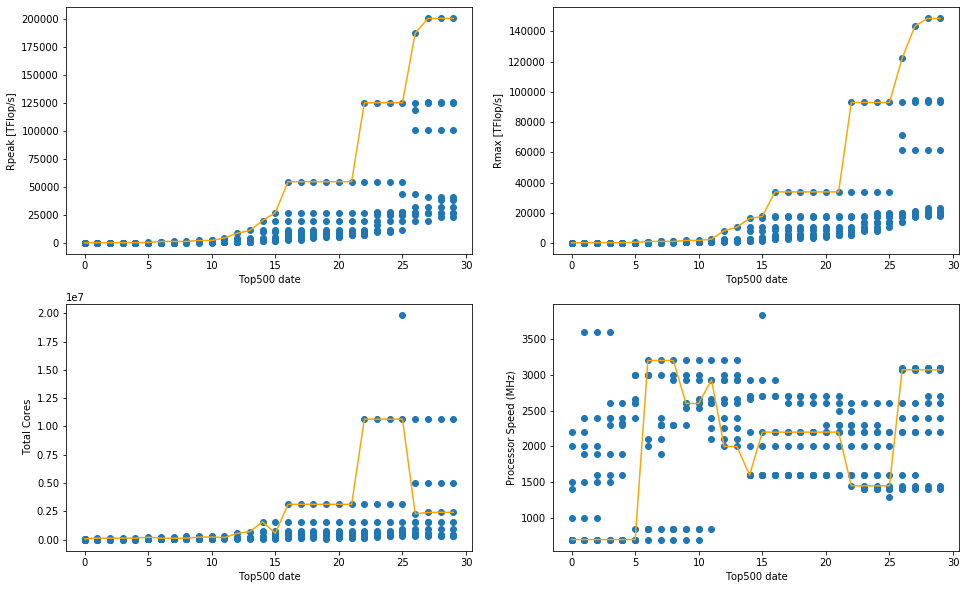

In [99]:
fig = plt.figure(figsize=(2*8,2*5))

fig.add_subplot(2, 2, 1)
plt.scatter(dftop["Order"], dftop["Rpeak [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rpeak [TFlop/s]"], c="orange")
plt.xlabel('Top500 date')
plt.ylabel('Rpeak [TFlop/s]')

fig.add_subplot(2, 2, 2)
plt.scatter(dftop["Order"], dftop["Rmax [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rmax [TFlop/s]"], c="orange")
plt.xlabel('Top500 date')
plt.ylabel('Rmax [TFlop/s]')

fig.add_subplot(2, 2, 3)
plt.scatter(dftop["Order"], dftop["Total Cores"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Total Cores"], c="orange")
plt.xlabel('Top500 date')
plt.ylabel('Total Cores')

fig.add_subplot(2, 2, 4)
plt.scatter(dftop["Order"], dftop["Processor Speed (MHz)"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Processor Speed (MHz)"], c="orange")
plt.xlabel('Top500 date')
plt.ylabel('Processor Speed (MHz)')

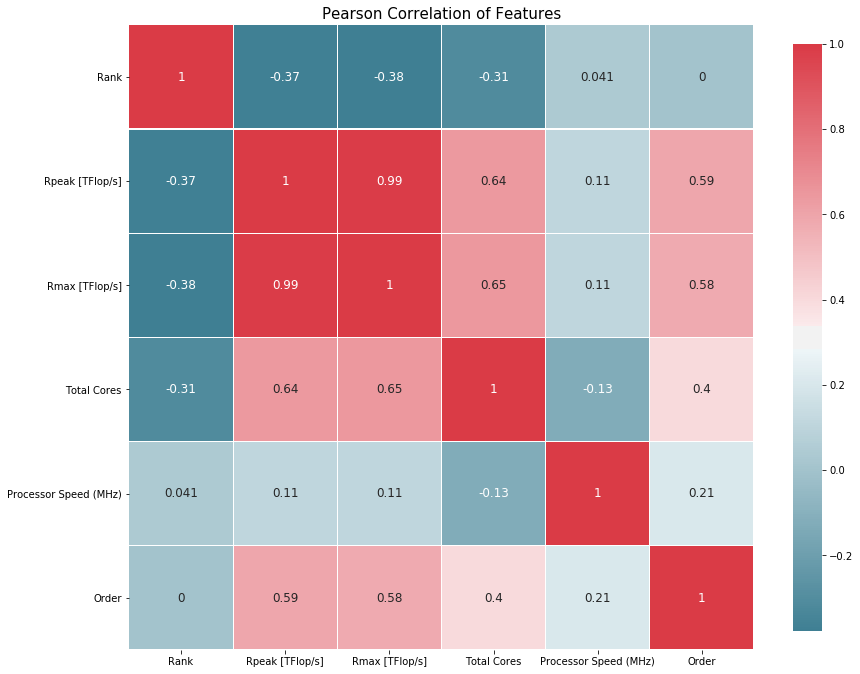

In [100]:
def correlation_heatmap(df1):
    """
    Print the Pearson correlation table between each features.

    Parameters
    ----------
    df1 : Pandas DataFrame

    Returns
    -------
    None.

    """
    
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(df1.corr(), 
                    cmap = colormap,
                    square=True, 
                    cbar_kws={'shrink':.9 }, 
                    ax=ax,
                    annot=True, 
                    linewidths=0.1,vmax=1.0, linecolor='white',
                    annot_kws={'fontsize':12 })
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

    
    
correlation_heatmap(dftop)

### Analyse

- **Rpeak**, **Ramax** and **Order** have strong similarities.
- So **Rpeak** and **Ramax** can be predicted only with **Order**.

In [101]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.metrics import median_absolute_error, r2_score

In [102]:
X = np.array(dftop[["Order", "Rank"]])
y = np.array(dftop["Rpeak [TFlop/s]"])

y_trans = np.log1p(y)

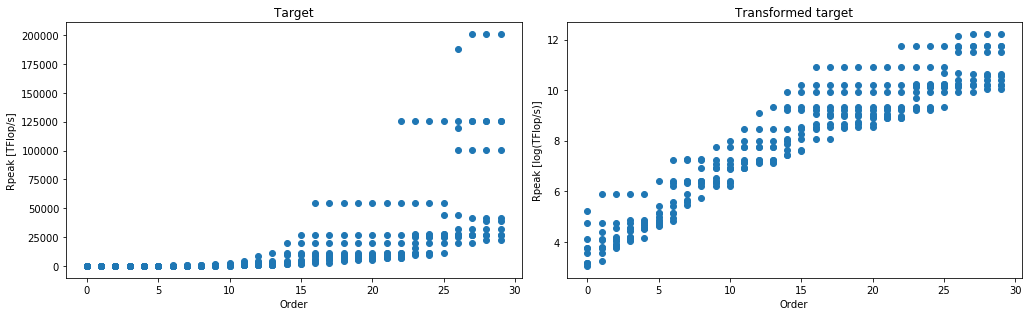

In [103]:
fig = plt.figure(figsize=(2*8,5))

fig.add_subplot(1, 2, 1)
plt.scatter(dftop["Order"], y)
plt.ylabel('Rpeak [TFlop/s]')
plt.xlabel('Order')
plt.title('Target')

fig.add_subplot(1, 2, 2)
plt.scatter(dftop["Order"], y_trans)
plt.ylabel('Rpeak [log(TFlop/s)]')
plt.xlabel('Order')
plt.title('Transformed target')

fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

X_train, X_test, y_train, y_test                         = train_test_split(X,       y, random_state=0)
X_trans_train, X_trans_test, y_trans_train, y_trans_test = train_test_split(X, y_trans, random_state=0)

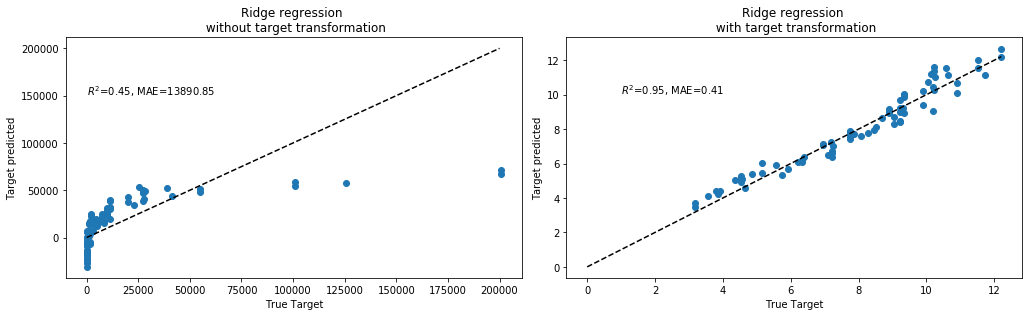

In [104]:
regr = RidgeCV()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

regr_trans = RidgeCV()
regr_trans.fit(X_trans_train, y_trans_train)
y_trans_pred = regr_trans.predict(X_trans_test)


fig = plt.figure(figsize=(2*8,5))

fig.add_subplot(1, 2, 1)
plt.scatter(y_test, y_pred)
plt.plot([0, 200000], [0, 200000], '--k')
plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.title('Ridge regression \n without target transformation')
plt.text(1, 150000, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_test, y_pred), median_absolute_error(y_test, y_pred)))

fig.add_subplot(1, 2, 2)
plt.scatter(y_trans_test, y_trans_pred)
plt.plot([0, np.log1p(200000)], [0, np.log1p(200000)], '--k')
plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.title('Ridge regression \n with target transformation')
plt.text(1, 10, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(y_trans_test, y_trans_pred), median_absolute_error(y_trans_test, y_trans_pred)))

fig.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

### What we should do

In [105]:
def f(i):
    if i%2 == 0:
        return "06-"+str(2020+int(i/2))
    else:
        return "11-"+str(2020+int((i-1)/2))

years_to_pred = 5
dfpred = pd.DataFrame({"Order":  [i for i in range(30, 30+2*years_to_pred) for j in range(head_num)],
                       "Top500": [f(i) for i in range(2*years_to_pred) for j in range(head_num)],
                       "Rank":   [j for i in range(dftop.shape[0], dftop.shape[0]+2*years_to_pred) for j in range(1,1+head_num)]})

- Rpeak values

In [106]:
# Define data
X = np.array(dftop[["Order", "Rank"]])
y = np.log1p((dftop["Rpeak [TFlop/s]"]))

# Regression
regr = RidgeCV()
regr.fit(X, y)
pred = regr.predict(np.array(dfpred[["Order", "Rank"]]))

# Update database
dfpred["Rpeak [TFlop/s]"] = np.expm1(pred)

- Rmax values

In [107]:
# Define data
X = np.array(dftop[["Order", "Rank"]])
y = np.log1p((dftop["Rmax [TFlop/s]"]))

# Regression
regr = RidgeCV()
regr.fit(X, y)
pred = regr.predict(np.array(dfpred[["Order", "Rank"]]))

# Update database
dfpred["Rmax [TFlop/s]"] = np.expm1(pred)

- Total Cores values

In [108]:
# Define data
X = np.array(dftop[['Order', 'Rank', 'Rpeak [TFlop/s]']])
y = dftop["Total Cores"]

# Regression
regr = RidgeCV()
regr.fit(X, y)
pred = regr.predict(np.array(dfpred[['Order', 'Rank', 'Rpeak [TFlop/s]']]))

# Update database
dfpred["Total Cores"] = pred

- Processor Speed values

In [109]:
from sklearn.linear_model import Lasso

In [110]:
# Define data
X = np.array(dftop[['Order', 'Rank', 'Rpeak [TFlop/s]', 'Total Cores']])
y = dftop["Processor Speed (MHz)"]

# Regression
regr = Lasso(positive=True, random_state=0)
regr.fit(X, y)
pred = regr.predict(np.array(dfpred[['Order', 'Rank', 'Rpeak [TFlop/s]', 'Total Cores']]))

# Update database
dfpred["Processor Speed (MHz)"] = pred

In [111]:
dfpred

,Order,Top500,Rank,Rpeak [TFlop/s],Rmax [TFlop/s],Total Cores,Processor Speed (MHz)
0,30,06-2020,1,3.990691e+05,264628.340952,1.465204e+07,2300.478797
1,30,06-2020,2,3.223787e+05,214723.856378,1.191924e+07,2308.240825
2,30,06-2020,3,2.604262e+05,174230.488393,9.697433e+06,2316.555902
3,30,06-2020,4,2.103792e+05,141373.464325,7.888430e+06,2325.317748
4,30,06-2020,5,1.699499e+05,114712.702715,6.412900e+06,2334.440505
...,...,...,...,...,...,...,...
95,39,11-2024,6,1.387021e+06,894743.244677,4.868425e+07,2546.663855
96,39,11-2024,7,1.120473e+06,726010.064162,3.936854e+07,2547.301305
97,39,11-2024,8,9.051487e+05,589097.022616,3.182888e+07,2549.860953
98,39,11-2024,9,7.312037e+05,478003.396049,2.572397e+07,2553.973406


Text(0, 0.5, 'Processor Speed (MHz)')

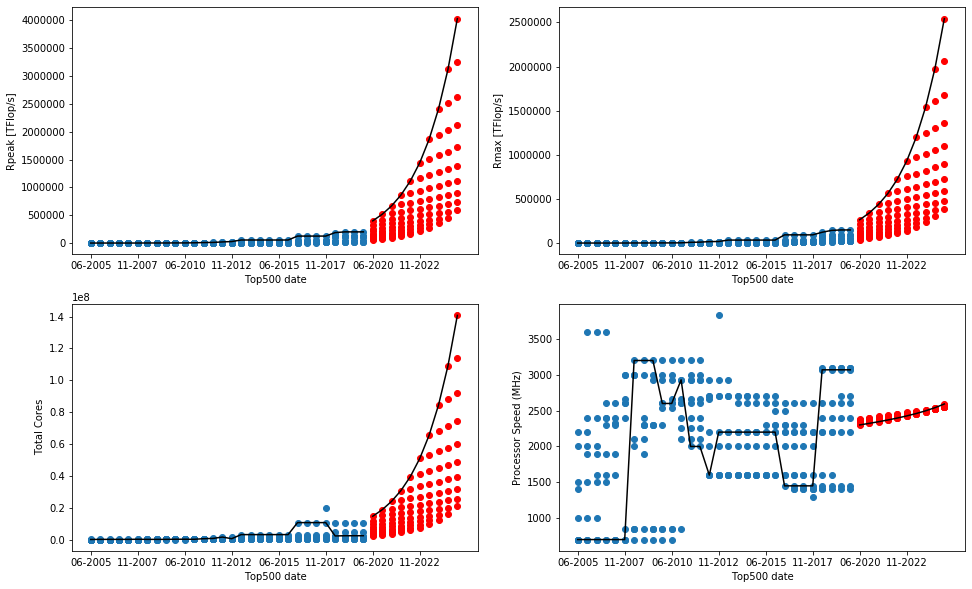

In [112]:
fig = plt.figure(figsize=(2*8,2*5))

fig.add_subplot(2, 2, 1)
plt.scatter(dftop["Top500"], dftop["Rpeak [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rpeak [TFlop/s]"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Rpeak [TFlop/s]"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Rpeak [TFlop/s]"], c="black")
plt.xticks(5*np.arange(0, int(40/5)))
plt.xlabel('Top500 date')
plt.ylabel('Rpeak [TFlop/s]')

fig.add_subplot(2, 2, 2)
plt.scatter(dftop["Top500"], dftop["Rmax [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rmax [TFlop/s]"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Rmax [TFlop/s]"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Rmax [TFlop/s]"], c="black")
plt.xticks(5*np.arange(0, int(40/5)))
plt.xlabel('Top500 date')
plt.ylabel('Rmax [TFlop/s]')

fig.add_subplot(2, 2, 3)
plt.scatter(dftop["Top500"], dftop["Total Cores"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Total Cores"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Total Cores"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Total Cores"], c="black")
plt.xticks(5*np.arange(0, int(40/5)))
plt.xlabel('Top500 date')
plt.ylabel('Total Cores')

fig.add_subplot(2, 2, 4)
plt.scatter(dftop["Top500"], dftop["Processor Speed (MHz)"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Processor Speed (MHz)"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Processor Speed (MHz)"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Processor Speed (MHz)"], c="black")
plt.xticks(5*np.arange(0, int(40/5)))
plt.xlabel('Top500 date')
plt.ylabel('Processor Speed (MHz)')

# Discuss results with respect to the Moore Law

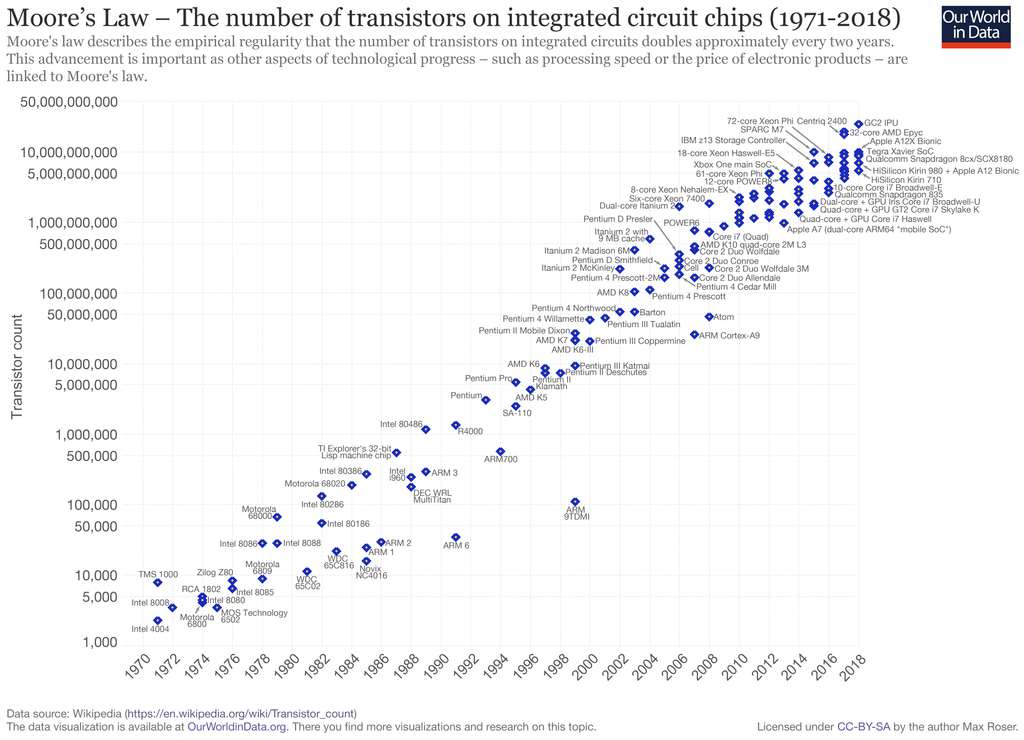

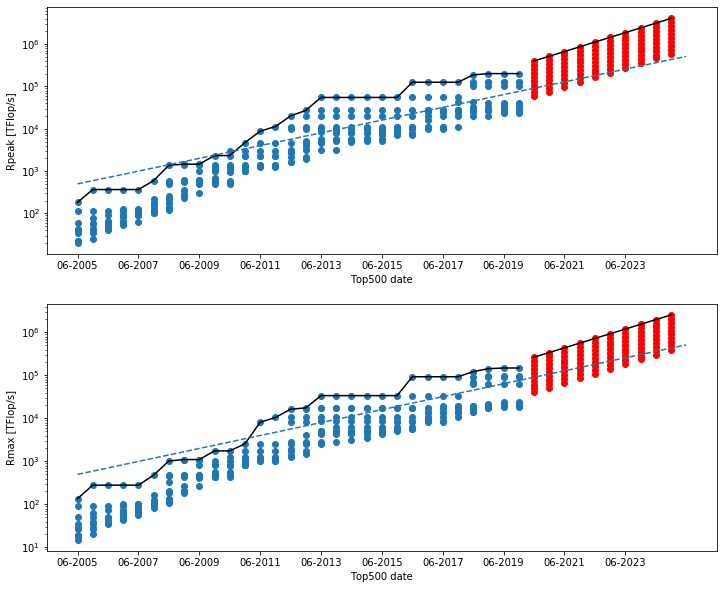

In [113]:
x_values = np.array(["06-200"+str(5+2*i) if (5+2*i)<10 else "06-20"+str(5+2*i) for i in range(11)])
y_values = [500]
last = 500
for i in range(10):
    val = last*2
    y_values.append(val)
    last = val


fig = plt.figure(figsize=(12,2*5))

fig.add_subplot(2, 1, 1)
plt.scatter(dftop["Top500"], dftop["Rpeak [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rpeak [TFlop/s]"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Rpeak [TFlop/s]"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Rpeak [TFlop/s]"], c="black")
plt.plot(x_values, y_values, "--")
plt.xticks(4*np.arange(0, 10))
plt.xlabel('Top500 date')
plt.ylabel('Rpeak [TFlop/s]')
plt.yscale('log')


fig.add_subplot(2, 1, 2)
plt.scatter(dftop["Top500"], dftop["Rmax [TFlop/s]"])
plt.plot(dftop[dftop['Rank']==1]["Order"], dftop[dftop['Rank']==1]["Rmax [TFlop/s]"], c="black")
plt.scatter(dfpred["Top500"], dfpred["Rmax [TFlop/s]"], c="red")
plt.plot(dfpred[dfpred['Rank']==1]["Order"], dfpred[dfpred['Rank']==1]["Rmax [TFlop/s]"], c="black")
plt.plot(x_values, y_values, "--")
plt.xticks(4*np.arange(0, 10))
plt.xlabel('Top500 date')
plt.ylabel('Rmax [TFlop/s]')
plt.yscale('log')


plt.savefig(os.path.join(resu_folder, "5_years_head_num_" + str(head_num)))